# Visualizing the Iris Data

This notebook loads the iris dataset from seaborn, so no separate csv downloads needed! Feel free to fork this notebook and begin visualizing right away.

I have also tried to use palettes that are colorblind-friendly.

Description of this dataset taken from <a href=https://www.kaggle.com/uciml/iris> Kaggle.com</a>:<br>
The Iris dataset was used in Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id<br>
SepalLengthCm<br>
SepalWidthCm<br>
PetalLengthCm<br>
PetalWidthCm<br>
Species

In [2]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import dataset
iris = sns.load_dataset('iris')

In [20]:
#View the head of the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

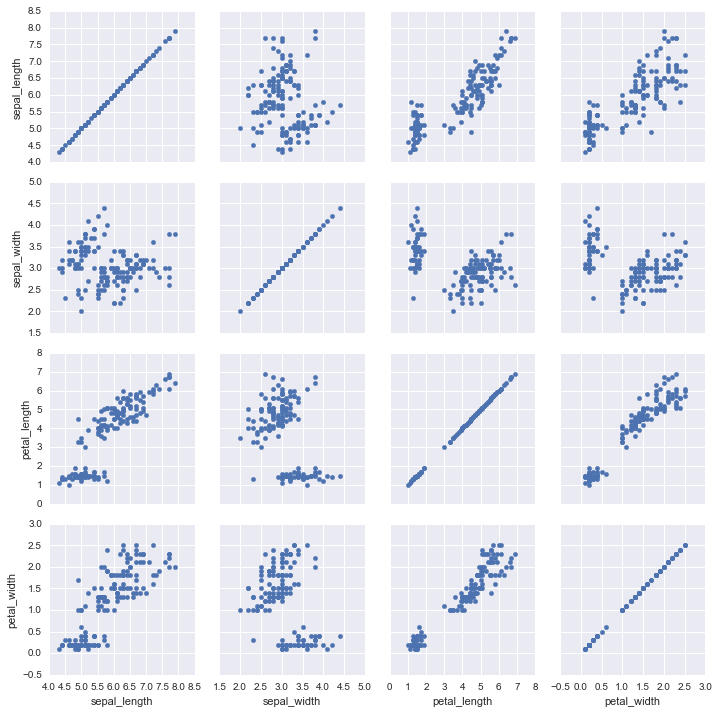

In [5]:
# Create emptry grids to plot the data into later
g = sns.PairGrid(iris)
# Then map scatter plots to the grid
g.map(plt.scatter)

These plots show some clustering that is likely a result of different iris species present in the data. Nevertheless, a positive relationship can be seen between petal_length and petal_width, as well as between petal_length and sepal_length.

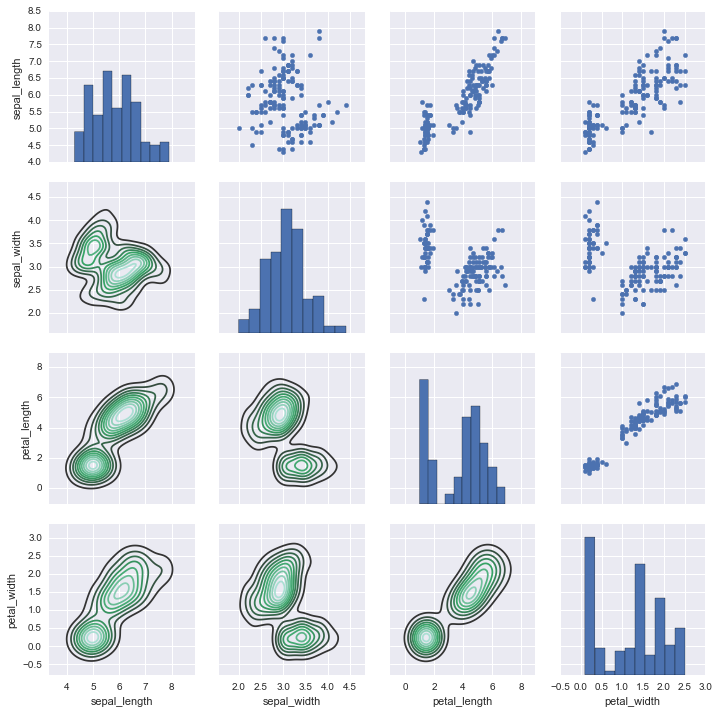

In [8]:
# We can adjust the pairgrid to plot other types of plots and avoid redundancy
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

Plotting the histogram across the diagonal cells is a common practice since those cells would otherwise contain correlations between the same variable. The kde plots show some separation between clusters that we could see in the scatter plots.

pairplot is a simpler version of PairGrid that will map histograms across the diagonal grids as a default

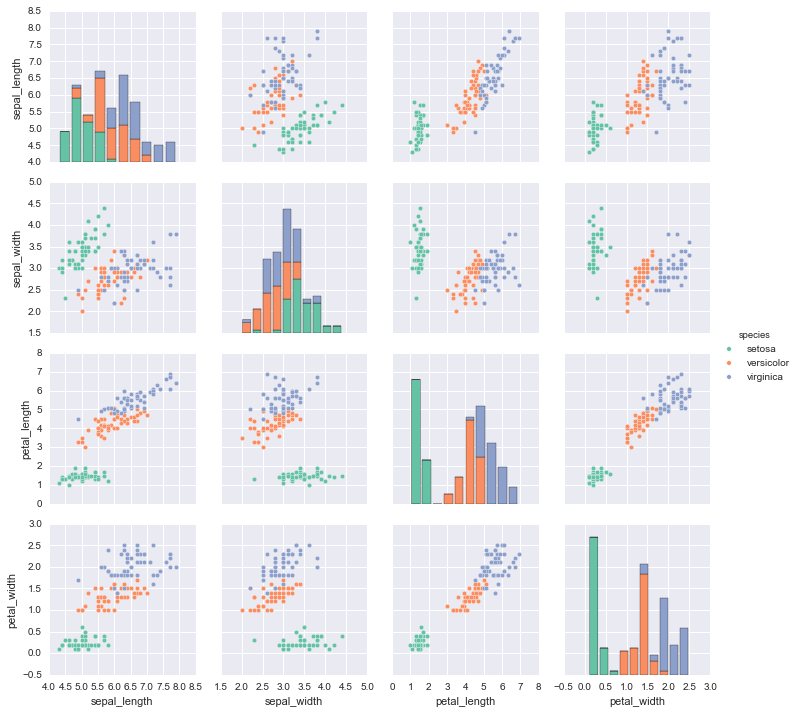

In [11]:
# Let's create a pairplot with the hue set to 'species' column so we can distinguish the patterns between species
sns.pairplot(iris,hue='species',palette='Set2')

The setosa species has a much clearer separation from the other species in many of these plots.

## JointPlot

JointGrid is the general version for jointplot() type grids

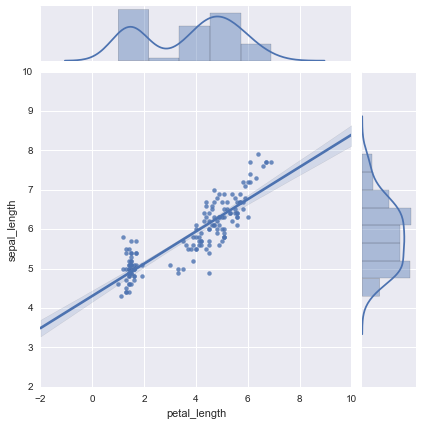

In [8]:
g = sns.JointGrid(x="petal_length", y="sepal_length", data=iris)
g = g.plot(sns.regplot, sns.distplot)

Same as above but as a jointplot:

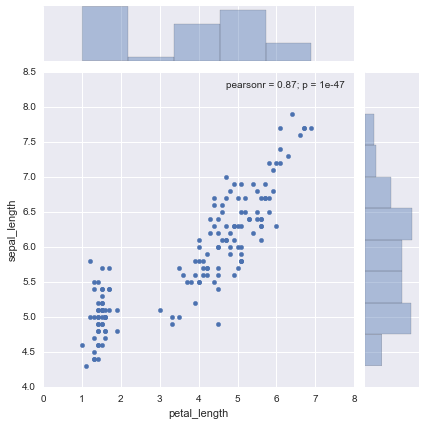

In [7]:
sns.jointplot(x="petal_length", y="sepal_length", data=iris)

The jointgrid between petal_length and sepal_width shows a scatter plot with a regression line between the two variables while the jointplot includes the pearson coefficient. In the margins of jointplots, univariate information can be plotted for that corresponding variable. We can see two humps in the petal_length histogram. The previous pairplots showed the setosa species having a shorter petal length than the other two species, which is shown by these two humps. 

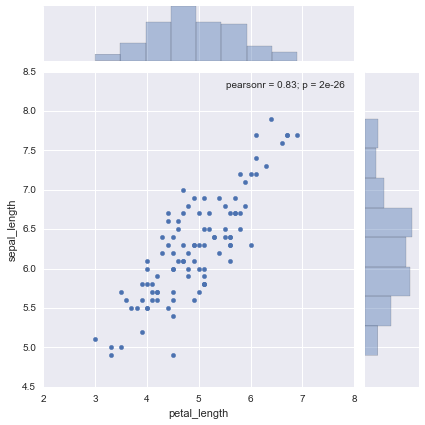

In [9]:
# Re-plotting by excluding the setosa species
sns.jointplot(x="petal_length", y="sepal_length", data=iris[iris['species']!='setosa'])

**Box plots can be used to visualize features in a different way. Let's look at the same feature, petal length, using boxplots:**

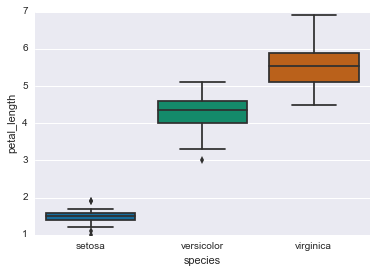

In [14]:
sns.boxplot(x="species", y="petal_length", data=iris, palette='colorblind')

Sometimes boxplots are helpful in visualizing if the groups in our data overlap for particular features. We could also do this with a histogram by adjusting the transparency to catch overlaps:

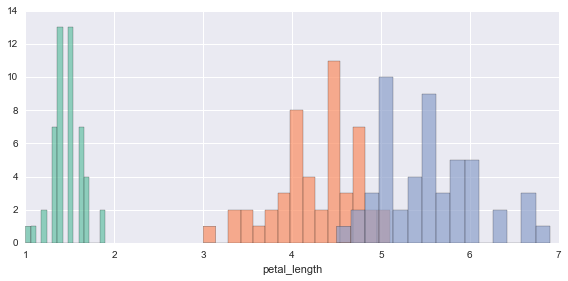

In [19]:
g = sns.FacetGrid(iris,hue="species",palette='Set2',size=4,aspect=2)
#map to grid:
g = g.map(plt.hist,'petal_length',bins=15,alpha=0.7)

Hopefully this demo showed you some ways we can use seaborn to visualize our data in different ways.